
Pymaceuticals Observations

* Capomulin seems successful at treating the tumors in these mice. It was the only treatment of those analyzed to actually reduce the total tumor volume over the 45 days. Also, survival rate was higher during the treatment although; metastatic sites continued to increased, though at a rate slower than the other treatments. 
* Ketapril may actually worsen the volume of the tumors. The growth of metastatic sites for mice on placebo and ketapril were indistinguishable given how their errors overlapped. This leads one to believe that Ketapril is not an effective method of treatment.
* Infubinol while it seemed to slow the spread of metastaic sites, it had a similar trend of treating the tumor volume to  the placebo. Unfortunately, it was the deadliest drug with the lowest survival rate. 

In [62]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
trial_df = pd.read_csv(clinical_trial_data_to_load)
mouse_df = pd.read_csv(mouse_drug_data_to_load)



# Combine the data into a single dataset
merged_df = trial_df.merge(mouse_df, on='Mouse ID', how= 'outer')

# Display the data table for preview
merged_df.head(20)


## Tumor Response to Treatment

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint and convert to dataframe
mean_tumor_vol = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())


# Preview DataFrame
mean_tumor_vol



# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint 
tumr_vol_se = pd.DataFrame(merged_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem())
#convert to DF
tumr_vol_se.reset_index()
# Preview DataFrame
tumr_vol_se


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [65]:
# Minor Data Munging to Re-Format the Data Frames (Turn into pivot table)
tumr_mean_pvt = mean_tumor_vol.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked

tumr_mean_pvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [66]:
tumr_se_pvt = tumr_vol_se.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
tumr_se_pvt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


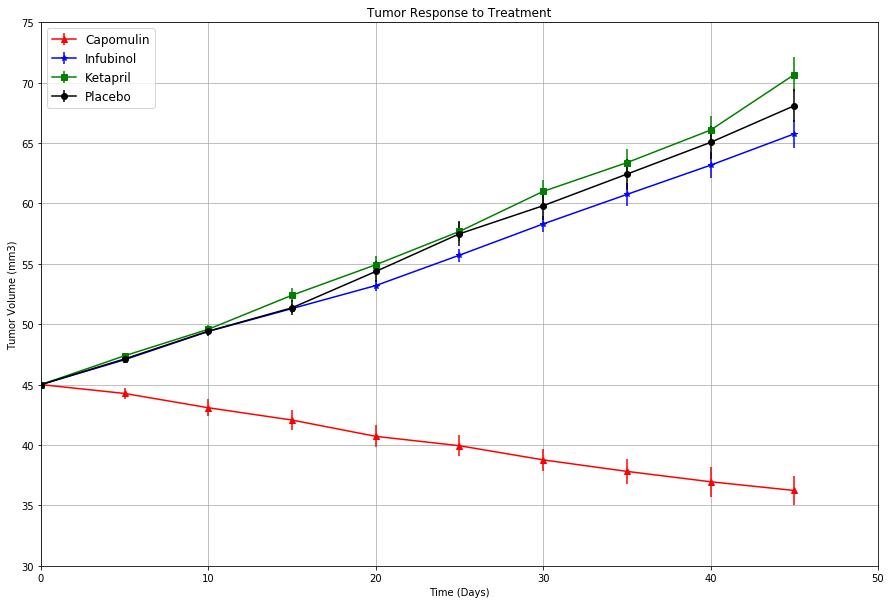

In [67]:
# Generate the Plot (with Error Bars)


fig, ax = plt.subplots(figsize=(15,10))

ax.errorbar(tumr_mean_pvt.index, tumr_mean_pvt['Capomulin'], yerr=tumr_se_pvt['Capomulin'],
             color='r', marker='^', label="Capomulin")

ax.errorbar(tumr_mean_pvt.index, tumr_mean_pvt['Infubinol'], yerr=tumr_se_pvt['Infubinol'],
             color='b', marker='*', label="Infubinol")

ax.errorbar(tumr_mean_pvt.index, tumr_mean_pvt['Ketapril'], yerr=tumr_se_pvt['Ketapril'],
             color='g', marker='s', label="Ketapril")

ax.errorbar(tumr_mean_pvt.index, tumr_mean_pvt['Placebo'], yerr=tumr_se_pvt['Placebo'],
             color='k', marker='o', label="Placebo")
ax.grid()
ax.set_xlim(0, 50, 5)
ax.set_ylim(30, 75, 5)


# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend
plt.legend(loc="upper left", fontsize="large", fancybox=True)


In [68]:
# Show the Figure

plt.savefig("Tumor_response.png")
plt.show()


<Figure size 432x288 with 0 Axes>

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [69]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())
# Convert to DataFrame
meta_mean.reset_index()
# Preview DataFrame
meta_mean

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [70]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_se = pd.DataFrame(merged_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem())
# Convert to DataFrame
meta_se.reset_index()
# Preview DataFrame
meta_se

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [71]:
# Minor Data Munging to Re-Format the Data Frames
meta_pvt = meta_mean.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
meta_pvt

meta_se_pvt = meta_se.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')
meta_se_pvt


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


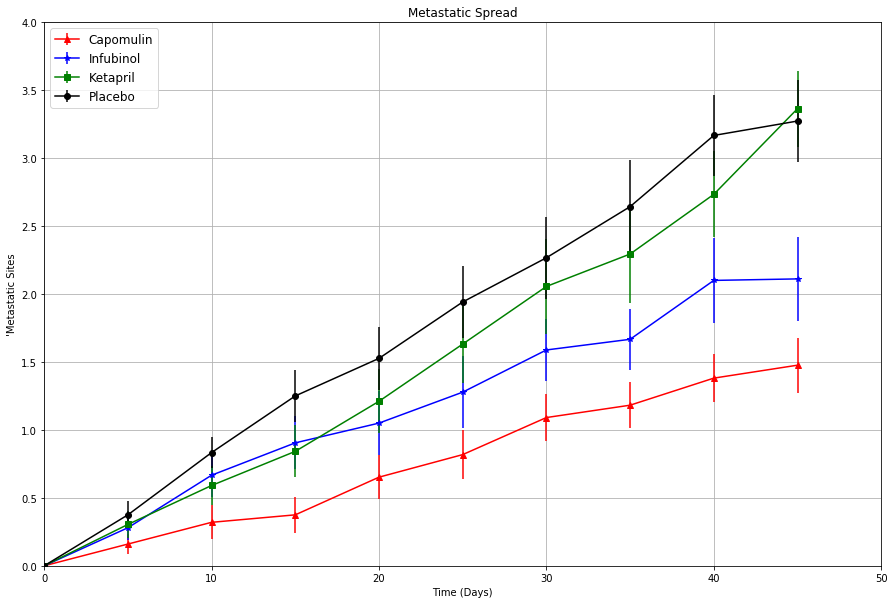

In [72]:
# Generate the Plot (with Error Bars)


fig, ax = plt.subplots(figsize=(15,10))

ax.errorbar(meta_pvt.index, meta_pvt['Capomulin'], yerr=meta_se_pvt['Capomulin'],
             color='r', marker='^', label="Capomulin")

ax.errorbar(meta_pvt.index, meta_pvt['Infubinol'], yerr=meta_se_pvt['Infubinol'],
             color='b', marker='*', label="Infubinol")

ax.errorbar(meta_pvt.index, meta_pvt['Ketapril'], yerr=meta_se_pvt['Ketapril'],
             color='g', marker='s', label="Ketapril")

ax.errorbar(meta_pvt.index, meta_pvt['Placebo'], yerr=meta_se_pvt['Placebo'],
             color='k', marker='o', label="Placebo")
ax.grid()
ax.set_xlim(0, 50, 5)
ax.set_ylim(0, 4, 1)


# Chart title
plt.title("Metastatic Spread")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("'Metastatic Sites")
# legend
plt.legend(loc="upper left", fontsize="large", fancybox=True)

# Save the Figure
plt.savefig("Metastic_Site_Change.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [73]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) and convert to dataframe
mouse_grouped_df = pd.DataFrame(merged_df.groupby(['Drug','Timepoint'])['Mouse ID'].nunique())
mouse_grouped_df.reset_index()

# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [74]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pvt = mouse_grouped_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse ID')
# Preview the Data Frame
mouse_pvt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


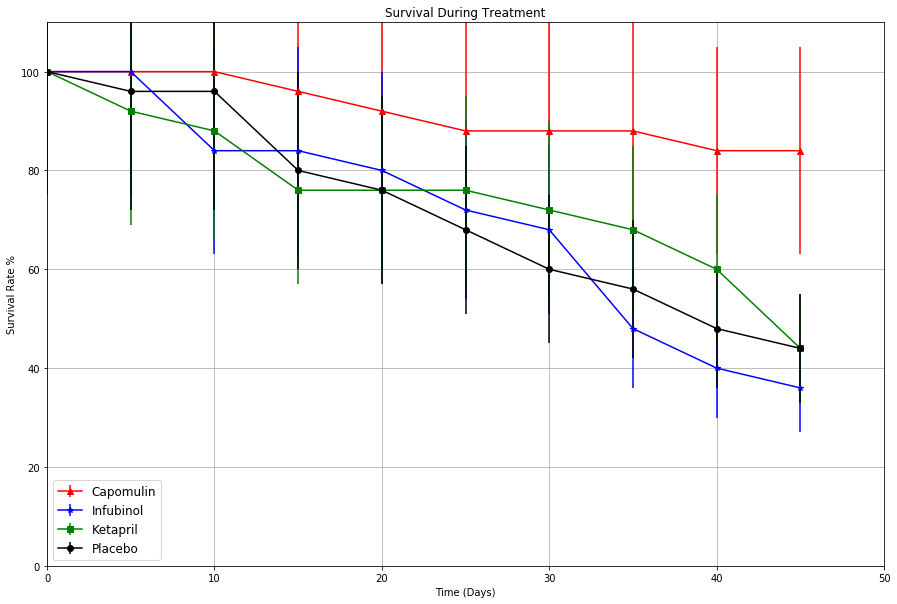

In [93]:
# Generate the Plot (Accounting for percentages)

fig, ax = plt.subplots(figsize=(15,10))

ax.errorbar(mouse_pvt.index, (mouse_pvt['Capomulin']/25)*100, yerr=mouse_pvt['Capomulin'],
             color='r', marker='^', label="Capomulin")

ax.errorbar(mouse_pvt.index, (mouse_pvt['Infubinol']/25)*100, yerr=mouse_pvt['Infubinol'],
             color='b', marker='*', label="Infubinol")

ax.errorbar(mouse_pvt.index, (mouse_pvt['Ketapril']/25)*100, yerr=mouse_pvt['Ketapril'],
             color='g', marker='s', label="Ketapril")

ax.errorbar(mouse_pvt.index, (mouse_pvt['Placebo']/25)*100, yerr=mouse_pvt['Placebo'],
             color='k', marker='o', label="Placebo")
ax.grid()
ax.set_xlim(0, 50, 5)
ax.set_ylim(0,110)


# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Survival Rate %")
# legend
plt.legend(loc="lower left", fontsize="large", fancybox=True)

# Save the Figure
plt.savefig("Survival_Rate.png")


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [95]:
# Calculate the percent changes for each drug
perc_chang = (tumr_mean_pvt.iloc[-1] - tumr_mean_pvt.iloc[0]) / tumr_mean_pvt.iloc[0]*100
# Display the data to confirm
perc_chang

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

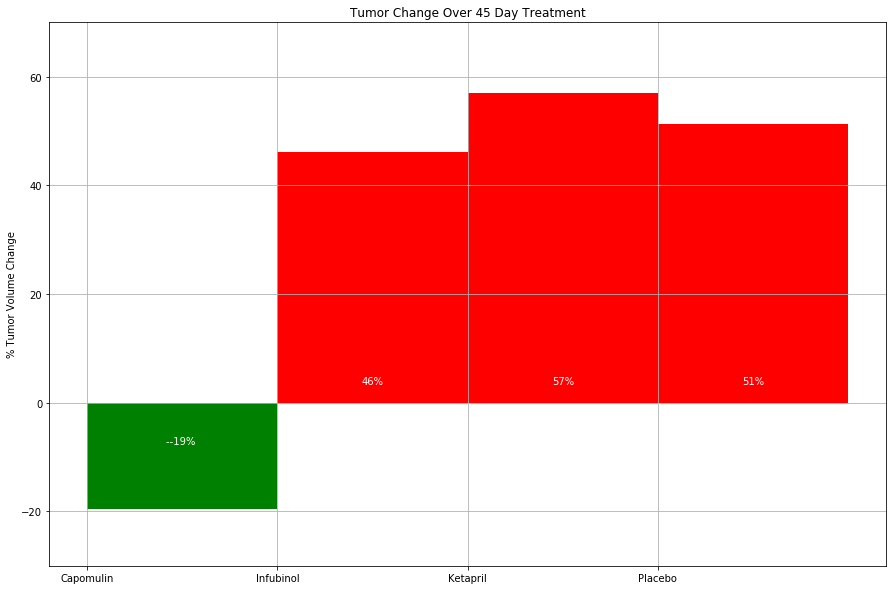

In [140]:
# Store all Relevant Percent Changes into a Tuple # Splice the data between passing and failing drugs

per_ch_tup =  (perc_chang["Capomulin"], 
               perc_chang["Infubinol"], 
               perc_chang["Ketapril"], 
               perc_chang["Placebo"])

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots(figsize=(15,10))
ind = np.arange(len(per_ch_tup))  
width = 1
rectsPass = ax.bar(ind[0], per_ch_tup[0], width, color='green')
rectsFail = ax.bar(ind[1:], per_ch_tup[1:], width, color='red')
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind - 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabel1(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabel2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

autolabel1(rectsFail)
autolabel2(rectsPass)


# Save the Figure
fig.savefig("Tumor_Change.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)